In [1]:
import imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from imblearn.datasets import fetch_datasets

In [5]:
mammography = fetch_datasets()['mammography']

In [6]:
mammography

{'data': array([[ 0.23001961,  5.0725783 , -0.27606055,  0.83244412, -0.37786573,
          0.4803223 ],
        [ 0.15549112, -0.16939038,  0.67065219, -0.85955255, -0.37786573,
         -0.94572324],
        [-0.78441482, -0.44365372,  5.6747053 , -0.85955255, -0.37786573,
         -0.94572324],
        ...,
        [ 1.2049878 ,  1.7637238 , -0.50146835,  1.5624078 ,  6.4890725 ,
          0.93129397],
        [ 0.73664398, -0.22247361, -0.05065276,  1.5096647 ,  0.53926914,
          1.3152293 ],
        [ 0.17700275, -0.19150839, -0.50146835,  1.5788636 ,  7.750705  ,
          1.5559507 ]]),
 'target': array([-1, -1, -1, ...,  1,  1,  1]),
 'DESCR': 'mammography'}

In [7]:
X = mammography['data']
Y = mammography['target']

In [8]:
X.shape

(11183, 6)

In [10]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [11]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096535e-10,1.297595e-09,5.698113e-10,-2.435705e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


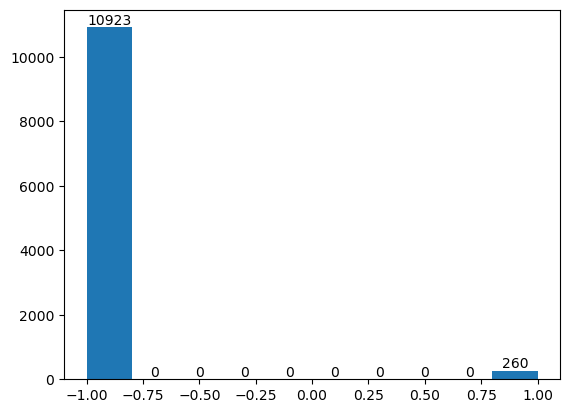

In [12]:
counts, edges, bars = plt.hist(Y)
plt.bar_label(bars)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [14]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [15]:
def report(y, y_pred):
    print(classification_report_imbalanced(y, y_pred))
    print('-'*100)
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [18]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [19]:
report(y_train, model_dtc.predict(X_train))

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

----------------------------------------------------------------------------------------------------
      B    M
B  8170   22
M    72  123


In [20]:
report(y_test, model_dtc.predict(X_test))

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

----------------------------------------------------------------------------------------------------
      B   M
B  2718  13
M    31  34


In [22]:
from sklearn.decomposition import PCA

In [21]:
def resample(sampler, X, Y):
    X_res, Y_res = sampler.fit_resample(X, Y)
    
    return X_res, Y_res

In [24]:
def visualize(X, X_res, Y, Y_res, x_oppacity=0.5):
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_res_pca = pca.transform(X_res)
    
    X_stacked = [X_pca, X_res_pca]
    Y_stacked = [Y, Y_res]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_oppacity if y == -1 else 1-x_oppacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title(f'{"After" if i else "Before"} resampling', c = 'blue' if i else 'green')
    plt.show()

In [32]:
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    model.fit(X_train, Y_train)
    report(Y_train, model.predict(X_train))
    print('='*100)
    report(Y_test, model.predict(X_test))
    return model

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

In [28]:
X_res, y_res = resample(ros, X_train, y_train)

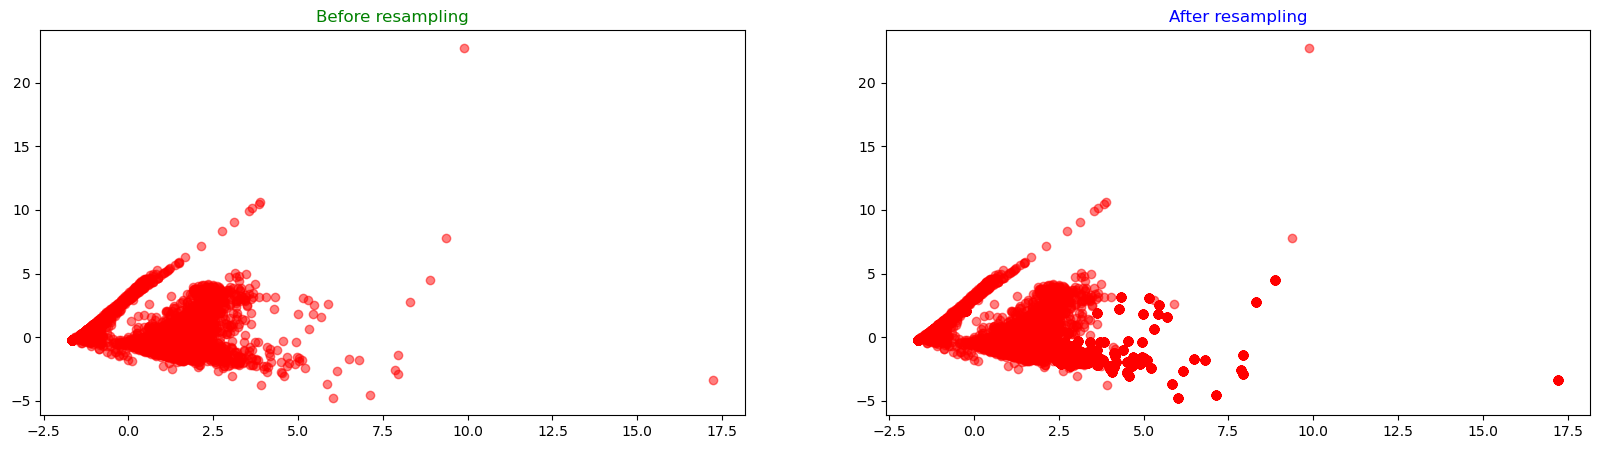

In [30]:
visualize(X_train, X_res, y_train, y_res)

In [33]:
model_ros = train_and_evaluate(X_res, y_res, X_train, y_train)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.96      0.93      0.95      0.95      0.90      8192
          1       0.96      0.93      0.96      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.89     16384

----------------------------------------------------------------------------------------------------
      B     M
B  7903   289
M   593  7599
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.96      0.93      0.98      0.95      0.90      8192
          1       0.39      0.93      0.96      0.54      0.95      0.89       195

avg / total       0.98      0.96      0.93      0.97      0.95      0.90      8387

----------------------------------------------------------------------------------------------------
      B    M
B  7903  289
M    14  181


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [36]:
X_res, y_res = resample(smote, X_train, y_train)

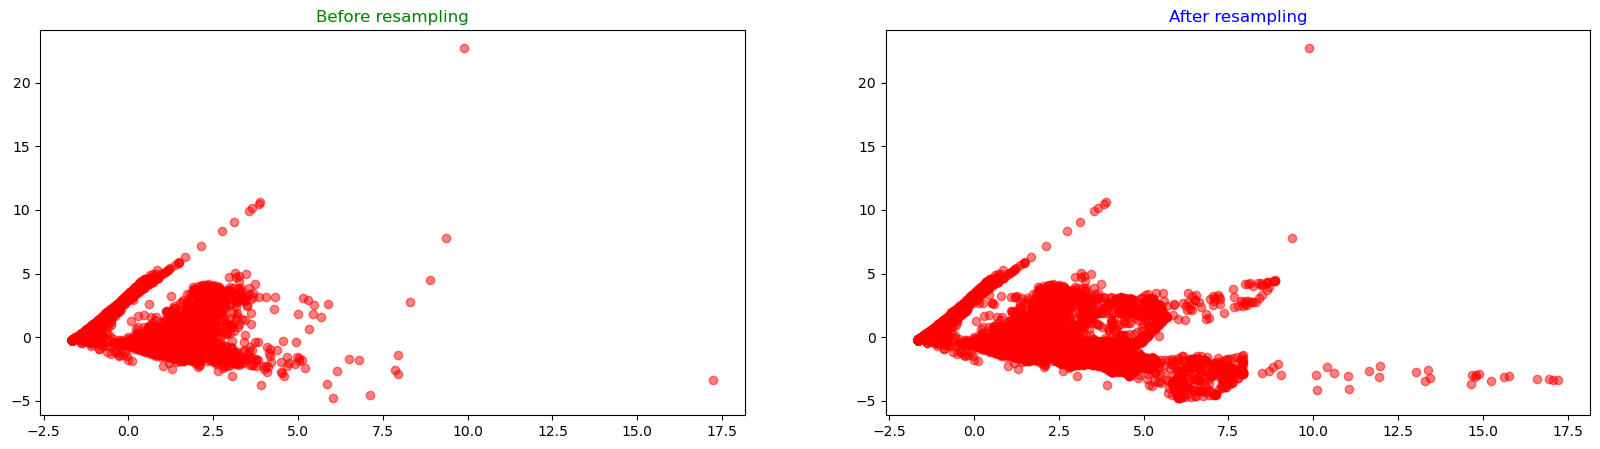

In [37]:
visualize(X_train, X_res, y_train, y_res)

In [38]:
model_smote = train_and_evaluate(X_res, y_res, X_test, y_test)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

----------------------------------------------------------------------------------------------------
      B     M
B  7865   327
M   444  7748
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.95      0.75      0.97      0.85      0.73      2731
          1       0.28      0.75      0.95      0.40      0.85      0.70        65

avg / total       0.98      0.95      0.76      0.96      0.85      0.73      2796

----------------------------------------------------------------------------------------------------
      B    M
B  2603  128
M    16   49


In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler()

In [41]:
X_res, y_res = resample(rus, X_train, y_train)

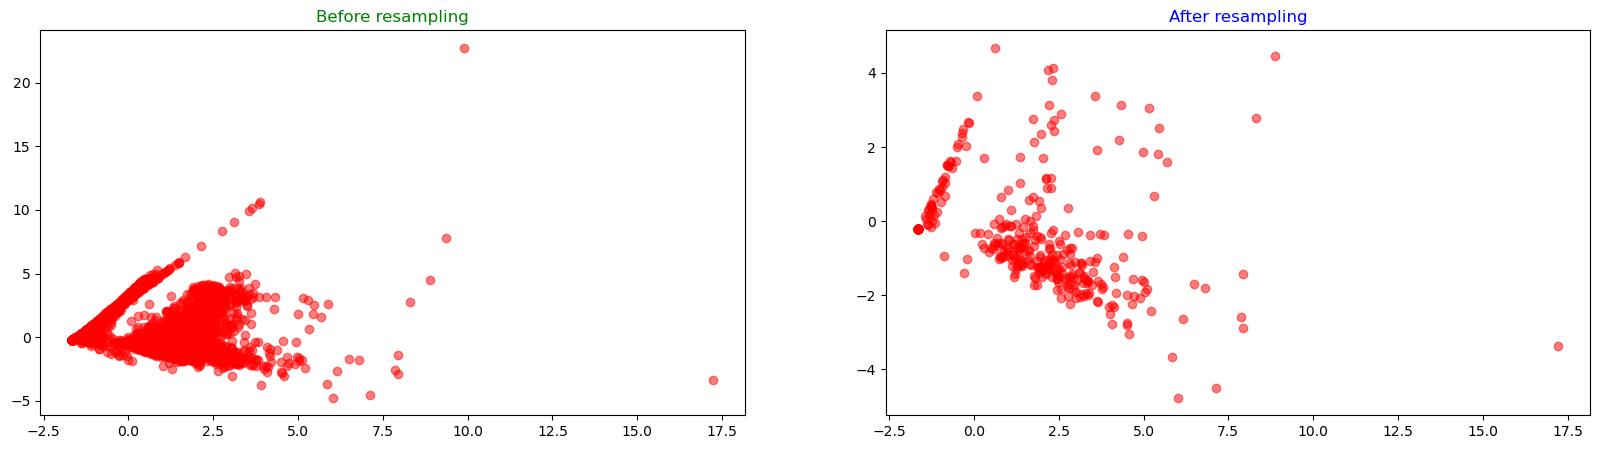

In [43]:
visualize(X_train, X_res, y_train, y_res)

In [44]:
model_rus = train_and_evaluate(X_res, y_res, X_train, y_train)

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.89      0.94      0.89      0.92      0.91      0.84       195
          1       0.94      0.89      0.94      0.91      0.91      0.83       195

avg / total       0.91      0.91      0.91      0.91      0.91      0.83       390

----------------------------------------------------------------------------------------------------
     B    M
B  183   12
M   22  173
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.88      0.89      0.93      0.88      0.78      8192
          1       0.15      0.89      0.88      0.25      0.88      0.78       195

avg / total       0.98      0.88      0.89      0.92      0.88      0.78      8387

----------------------------------------------------------------------------------------------------
      B    M
B  7195  997
M    22  173
